In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# 读取数据
data = pd.read_excel('Z:\桌面\graduate_analysis_24\output\outdata\机器学习.xlsx')
data.head()

,gene,logFC,score,label
0,Acaa2,-0.616739,222.000000,1
1,Alas2,0.931602,355.966667,1
2,Aox1,-0.573632,654.000000,1
3,Arrdc2,-0.564524,0.000000,1
4,Arrdc3,-0.631630,0.000000,1


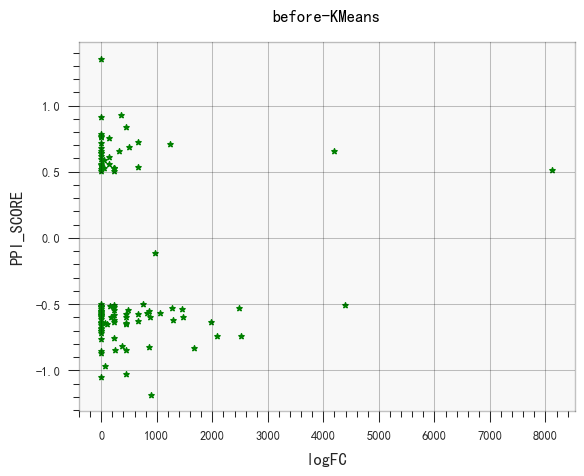

In [13]:
# 可视化展示
# 为防止绘图时中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 绘制散点图
from qbstyles import mpl_style

# 深色主题
mpl_style(dark=True)

# 非深色主题
mpl_style(dark=False)
plt.scatter(data['score'], data['logFC'], c="green", marker='*') 
plt.xlabel('logFC') # 添加x轴名称
plt.ylabel('PPI_SCORE') # 添加y轴名称
plt.title('before-KMeans')
plt.show()

In [8]:
# 模型训练
kms = KMeans(n_clusters=3, random_state=123) 
kms.fit(data.iloc[:,1:3])
label = kms.labels_
print(label)

[1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 2 1 2 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1]


e:\Miniconda\app\envs\numpy_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


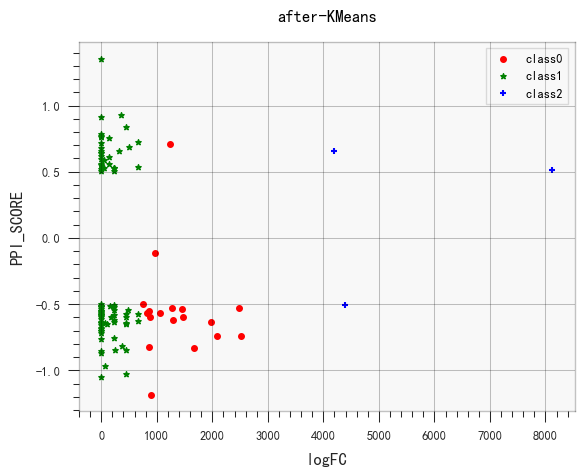

In [9]:
# 建模效果可视化展示
import matplotlib.pyplot as plt

from qbstyles import mpl_style

# 深色主题
mpl_style(dark=True)

# 非深色主题
mpl_style(dark=False)
# 颜色
# plt.colorbar(label='Y2')
# 以红色圆圈样式绘制散点图并加上标签 
plt.scatter(data[label == 0].iloc[:, 2], data[label == 0].iloc[:, 1],  c="red", marker='o', label='class0') 
# 以绿色星星样式绘制散点图并加上标签 
plt.scatter(data[label == 1].iloc[:, 2], data[label == 1].iloc[:, 1],  c="green", marker='*', label='class1') 
 # 以蓝色加号样式绘制散点图并加上标签
plt.scatter(data[label == 2].iloc[:, 2], data[label == 2].iloc[:, 1],  c="blue", marker='+', label='class2') 
plt.xlabel('logFC') # 添加x轴名称
plt.ylabel('PPI_SCORE') # 添加y轴名称
plt.title('after-KMeans')
plt.legend()

plt.show()